<a href="https://colab.research.google.com/github/priyanka-sidhuraj/127/blob/main/115.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Uploading the csv
from google.colab import files
data_to_load = files.upload()

Saving 115.csv to 115 (1).csv


In [ ]:
import pandas as pd
import plotly.express as px

df = pd.read_csv("115.csv")

temperature_list = df["Temperature"].tolist()
melted_list = df["Melted"].tolist()

fig = px.scatter(x=temperature_list, y=melted_list)
fig.show()

In [ ]:
import numpy as np

temperature_array = np.array(temperature_list)
melted_array = np.array(melted_list)

#Slope and intercept using pre-built function of Numpy
m, c = np.polyfit(temperature_array, melted_array, 1)

y = []
for x in temperature_array:
  y_value = m*x + c
  y.append(y_value)

#plotting the graph
fig = px.scatter(x=temperature_array, y=melted_array)
fig.update_layout(shapes=[
    dict(
      type= 'line',
      y0= min(y), y1= max(y),
      x0= min(temperature_array), x1= max(temperature_array)
    )
])
fig.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning:

overflow encountered in exp



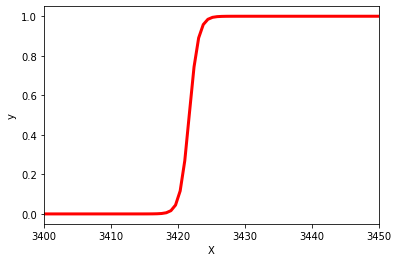

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression



X = np.reshape(temperature_list, (len(temperature_list), 1))
Y = np.reshape(melted_list, (len(melted_list), 1))

lr = LogisticRegression()
lr.fit(X, Y)


def model(x):
  return 1 / (1 + np.exp(-x)) #calculating sigmoid function

#Using the line formula 
X_test = np.linspace(0,3450,5000) #to create an evenly spaced sequence in a specified interval.
melting_chances = model(X_test * lr.coef_ + lr.intercept_).ravel() #mx+c ravel to create a single array

plt.plot(X_test, melting_chances, color='red', linewidth=3)
plt.ylabel('y')
plt.xlabel('X')
plt.xlim(3400, 3450)
plt.show()

In [ ]:
temp = float(input("Enter the temperature here:- "))
chances = model(temp * lr.coef_ + lr.intercept_).ravel()[0]
if chances <= 0.01:
  print("Tungsten will not be melted")
elif chances >= 1:
  print("Tungsten will be melted")

else:
  print("Tungsten might get melted")